In [33]:
!py --version

Python 3.10.0


In [34]:
import sys
print(sys.executable)

D:\Data Science\CNN_Image_Classifier\cnn_image_classifier\Scripts\python.exe


In [35]:
!pip install "tensorflow==2.10.0" opencv-python matplotlib "tensorflow_gpu==2.10.0" 

You should consider upgrading via the 'D:\Data Science\CNN_Image_Classifier\cnn_image_classifier\Scripts\python.exe -m pip install --upgrade pip' command.


In [36]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
asttokens                    2.4.1
astunparse                   1.6.3
cachetools                   5.3.3
certifi                      2024.2.2
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.2.1
cycler                       0.12.1
debugpy                      1.8.1
decorator                    5.1.1
exceptiongroup               1.2.1
executing                    2.0.1
flatbuffers                  24.3.25
fonttools                    4.51.0
gast                         0.4.0
google-auth                  2.29.0
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.63.0
h5py                         3.11.0
idna                         3.7
ipykernel                    6.29.4
ipython                      8.24.0
jedi                         0.19.1
j

You should consider upgrading via the 'D:\Data Science\CNN_Image_Classifier\cnn_image_classifier\Scripts\python.exe -m pip install --upgrade pip' command.


In [37]:
!pip show tensorflow

Name: tensorflow
Version: 2.10.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: d:\data science\cnn_image_classifier\cnn_image_classifier\lib\site-packages
Requires: grpcio, gast, typing-extensions, tensorflow-estimator, numpy, protobuf, termcolor, libclang, absl-py, tensorboard, h5py, flatbuffers, setuptools, wrapt, google-pasta, keras-preprocessing, packaging, astunparse, tensorflow-io-gcs-filesystem, opt-einsum, keras, six
Required-by: 


In [104]:
import tensorflow as tf
import os

In [105]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [106]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [107]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [108]:
data_dir = 'data'

In [109]:
os.listdir(data_dir)

['happy', 'sad']

In [110]:
os.listdir(os.path.join(data_dir,'happy'))

['-all-together-having-fun-on-warm-sunny-day-in-summer-park-diverse-2169636253.jpg',
 '-at-the-beach-happy-young-people-on-a-summer-vacation-at-the-beach-DMDF04022.jpg',
 '-background-of-empty-sunset-beach-travel-or-sea-vacations-concept-free-photo.jpg',
 '-guy-looking-at-camera-freedom-happiness-carefree-happy-people-concept-photo.jpg',
 '-guy-looking-at-camera-freedom-happiness-carefree-happy-people-concept-photo2.jpg',
 '-happy-adult-cheerful-portrait-lifestyles-person-happiness-summer-smile-face.jpg',
 '-nature-with-volunteer-and-plastic-for-help-energy-and-pollution-fit_400_400.jpg',
 '-rooftop-multicultural-friends-having-fun-together-on-the-weekend-JLPSF09488.jpg',
 '-the-beach-mother-and-father-holding-son-against-blue-sea-and-sky-2123793446.jpg',
 '-the-road-in-their-favorite-car-holiday-and-travel-family-concept-free-video.jpg',
 '-time-together-concepts-about-elderly-seniority-and-wellness-aging-DMDF02113.jpg',
 '05-12-21-happy-people.jpg',
 '0C7A6798.jpg',
 '0O1A7820.jpg',


In [111]:
image_exts = ['jpeg','jpg','bmp','png']

In [112]:
# This code block remove all images from happy and sad folder which have inappropriate extensions or have size < 10kb

for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        image_size_kb = os.path.getsize(image_path)/1024
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts or image_size_kb<10:
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [113]:
img = cv2.imread(os.path.join(data_dir, 'happy', '05-12-21-happy-people.jpg'))

In [114]:
type(img)

numpy.ndarray

In [115]:
img.shape

(880, 1400, 3)

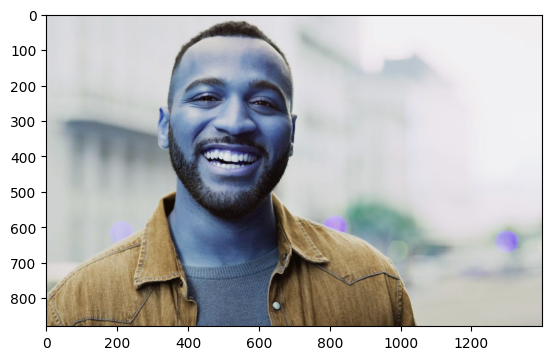

In [116]:
plt.imshow(img)
plt.show()

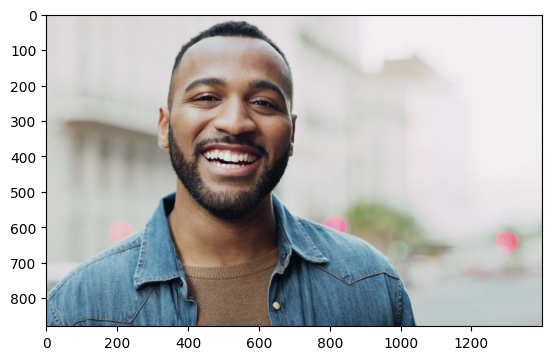

In [117]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [118]:
# Gives documentation of tf data api
# tf.data.Dataset??

In [119]:
import numpy as np

In [120]:
# Automatically creates dataset from raw data
data = tf.keras.utils.image_dataset_from_directory('data')

Found 727 files belonging to 2 classes.


In [121]:
# tf.keras.utils.image_dataset_from_directory??

In [122]:
# data is actually a Batch Dataset so we cannot use it directory. We take its on instance/batch at a time. To do this we convert it to numpy iterator.
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [123]:
data_iterator = data.as_numpy_iterator()

In [124]:
batch = data_iterator.next()

In [125]:
len(batch)
# 2 implies that there are two parts to this dataset viz. images and labels.

2

In [126]:
# Images represented as numpy arrays
batch[0].shape
# There are 32 images per batch

(32, 256, 256, 3)

In [127]:
batch[1]

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1])

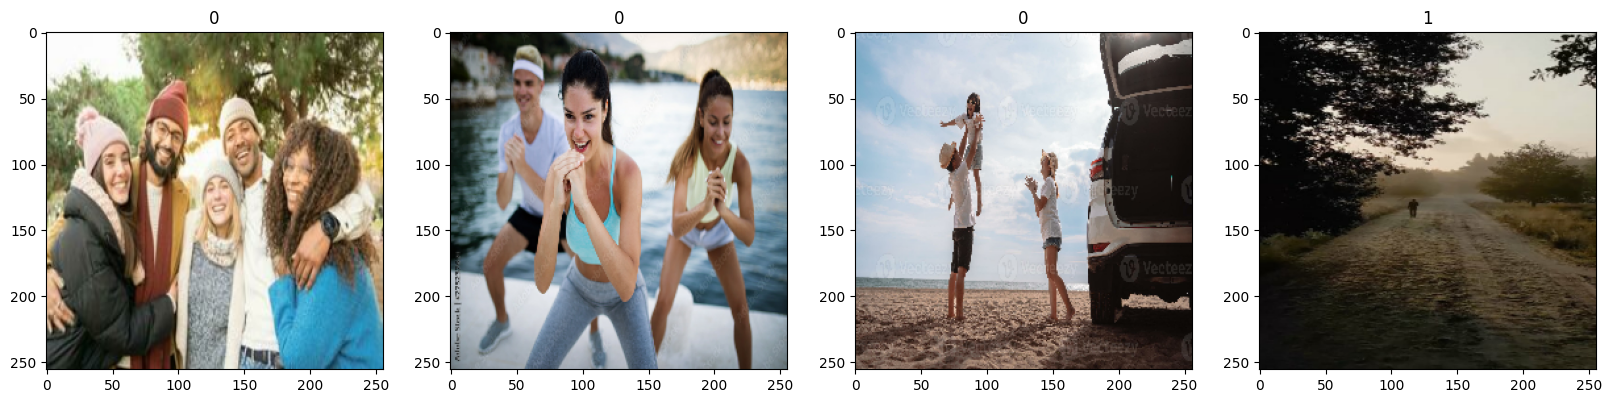

In [128]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [129]:
# Scale Data
data = data.map(lambda x,y: (x/255, y))

In [130]:
scaled_iterator = data.as_numpy_iterator()

In [131]:
batch = scaled_iterator.next()

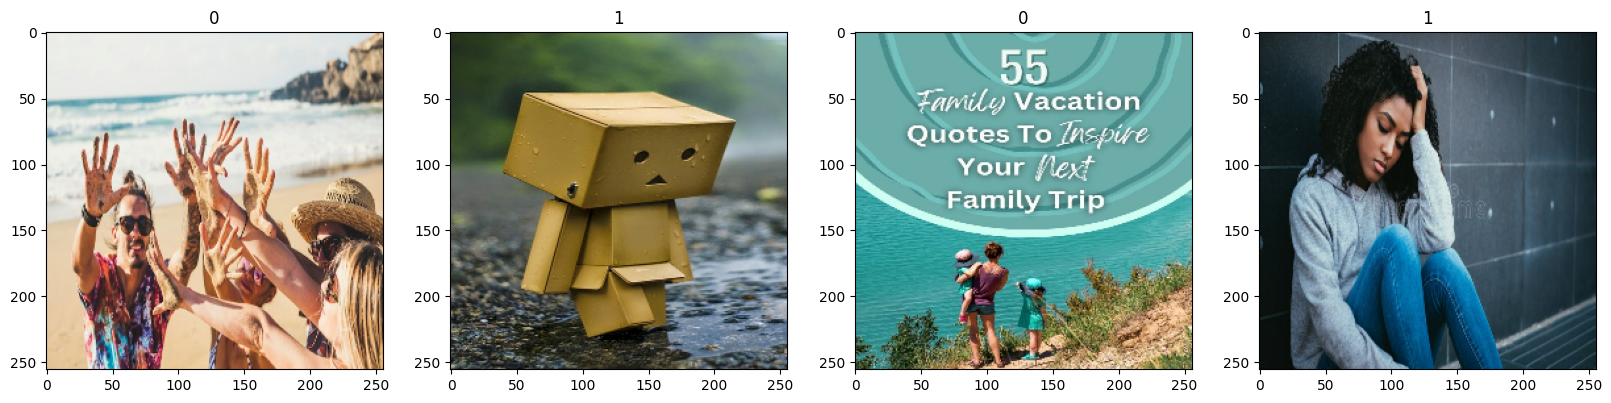

In [132]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [133]:
# Split Data
len(data)
# Each batch has 32 images

23

In [136]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [135]:
print(train_size, val_size, test_size)

16 4 3


In [137]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Before doing this make sure data is already shuffeled. Here data is shuffled.

In [138]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [139]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [140]:
model = Sequential()

In [141]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [142]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [143]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [145]:
logdir = 'logs'

In [146]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [147]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
16/16 [==============================] - 21s 245ms/step - loss: 0.7464 - accuracy: 0.5684 - val_loss: 0.6299 - val_accuracy: 0.6172
Epoch 2/20
16/16 [==============================] - 5s 280ms/step - loss: 0.5853 - accuracy: 0.6816 - val_loss: 0.5452 - val_accuracy: 0.6953
Epoch 3/20
16/16 [==============================] - 5s 267ms/step - loss: 0.4757 - accuracy: 0.7715 - val_loss: 0.4257 - val_accuracy: 0.8516
Epoch 4/20
16/16 [==============================] - 5s 263ms/step - loss: 0.3921 - accuracy: 0.8242 - val_loss: 0.3706 - val_accuracy: 0.8828
Epoch 5/20
16/16 [==============================] - 5s 274ms/step - loss: 0.3296 - accuracy: 0.8770 - val_loss: 0.2764 - val_accuracy: 0.9062
Epoch 6/20
16/16 [==============================] - 5s 275ms/step - loss: 0.2555 - accuracy: 0.9023 - val_loss: 0.2399 - val_accuracy: 0.8984
Epoch 7/20
16/16 [==============================] - 5s 275ms/step - loss: 0.2051 - accuracy: 0.9258 - val_loss: 0.2732 - val_accuracy: 0.9141
Epoch

In [ ]:
hist.history

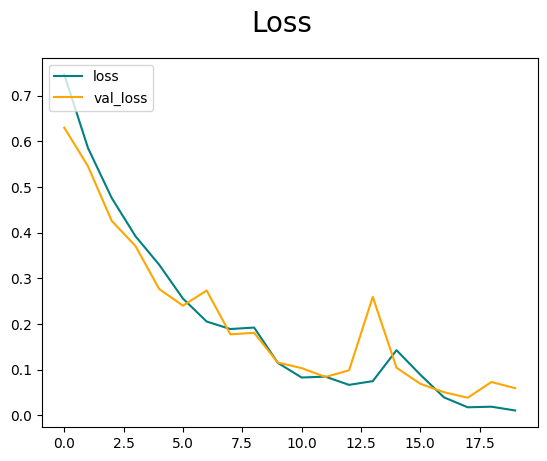

In [148]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

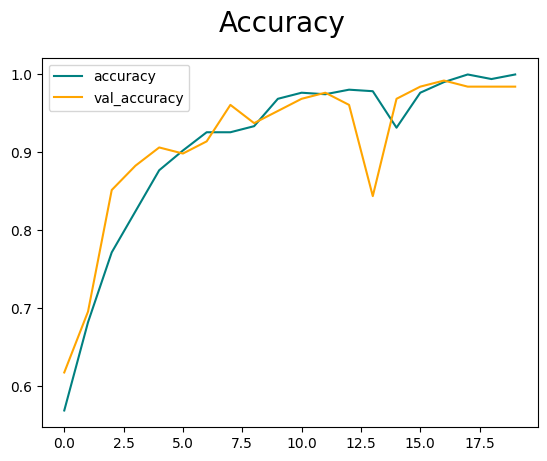

In [149]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [150]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [151]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [152]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 44ms/step


In [153]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.96428573, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.984375, shape=(), dtype=float32)


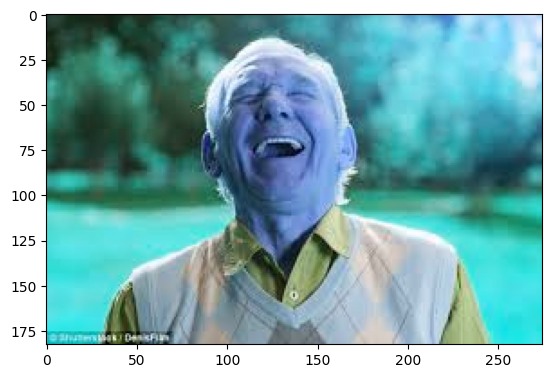

In [175]:
img = cv2.imread('happytest.jpeg')
plt.imshow(img)
plt.show()

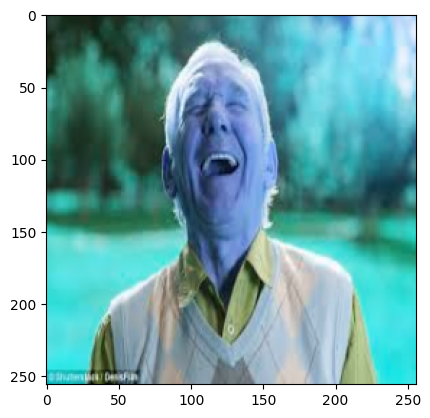

In [176]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [177]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 16ms/step


In [178]:
yhat

array([[0.02081029]], dtype=float32)

In [179]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [180]:
from tensorflow.keras.models import load_model

In [181]:
model.save(os.path.join('models','imageclassifier.h5'))

In [184]:
new_model = load_model('imageclassifier.h5')

In [185]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 58ms/step


array([[0.02081029]], dtype=float32)